https://www.kaggle.com/rmisra/news-category-dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [3]:
import nltk, re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
import pickle

In [5]:
from tqdm.auto import tqdm
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [6]:
pd.options.display.max_colwidth = -1

## Import Data

In [7]:
data = pd.read_json('News_Category_Dataset_v2.json', lines=True)

In [8]:
data.shape

(200853, 6)

In [9]:
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


## EDA

### Dropping Irrelvant Data

In [10]:
data = data.drop(['authors', 'date', 'link'], axis=1)

In [11]:
data.head()

,category,headline,short_description
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",She left her husband. He killed their children. Just another day in America.
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment."""


### News Categories and their counts

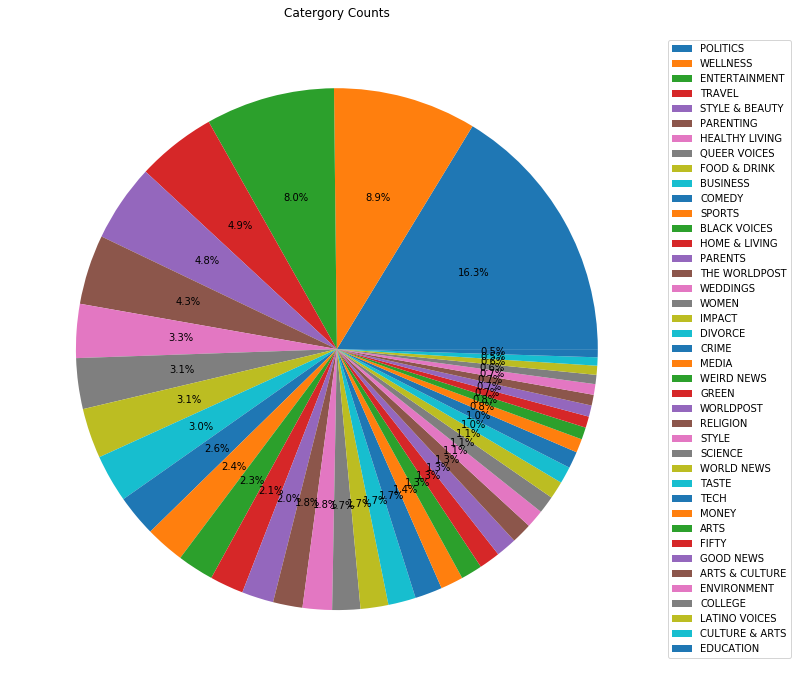

In [12]:
plotdata = data['category'].value_counts()

fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))

ax.pie(plotdata, autopct='%1.1f%%')

ax.legend(plotdata.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Catergory Counts")

plt.show()

### Generalising the categories

In [13]:
print(plotdata.index,len(plotdata.index))

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING',
       'PARENTS', 'THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'IMPACT', 'DIVORCE',
       'CRIME', 'MEDIA', 'WEIRD NEWS', 'GREEN', 'WORLDPOST', 'RELIGION',
       'STYLE', 'SCIENCE', 'WORLD NEWS', 'TASTE', 'TECH', 'MONEY', 'ARTS',
       'FIFTY', 'GOOD NEWS', 'ARTS & CULTURE', 'ENVIRONMENT', 'COLLEGE',
       'LATINO VOICES', 'CULTURE & ARTS', 'EDUCATION'],
      dtype='object') 41


In [14]:
def generalize(x):
    if x in ['BUSINESS', 'MONEY']:
        return 'BUSINESS'
    if x in ['SCIENCE', 'TECH', 'ARTS', 'ARTS & CULTURE', 'COLLEGE', 'CULTURE & ARTS', 'EDUCATION']:
        return 'EDUCATION'
    if x in ['WELLNESS', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'HOME & LIVING', 'FOOD & DRINK', 'PARENTS', 'WEDDINGS', 'WOMEN', 'DIVORCE', 'RELIGION', 'STYLE', 'TASTE', 'FIFTY']:
        return 'LIFESTYLE'
    if x in ['QUEER VOICES', 'BLACK VOICES', 'THE WORLDPOST', 'WORLDPOST', 'WORLD NEWS', 'LATINO VOICES', 'IMPACT', 'MEDIA']:
        return 'GLOBAL'
    if x in ['COMEDY', 'CRIME', 'WEIRD NEWS', 'GREEN', 'GOOD NEWS', 'ENVIRONMENT']:
        return 'MISCELLANEOUS'
    else:
        return x

In [15]:
data['category'] = data['category'].progress_apply(generalize)

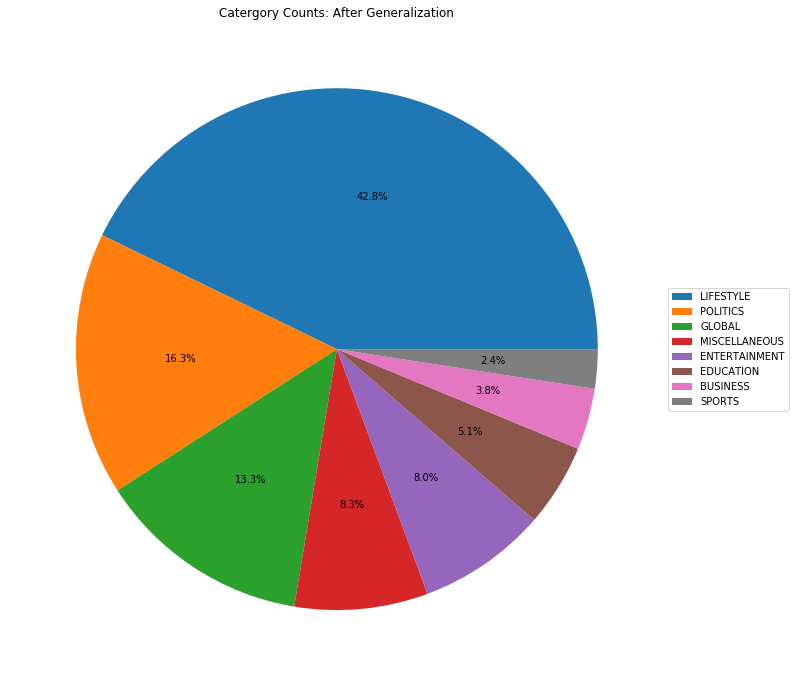

In [16]:
plotdata = data['category'].value_counts()

fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))

ax.pie(plotdata, autopct='%1.1f%%')

ax.legend(plotdata.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Catergory Counts: After Generalization")

plt.show()

In [17]:
print(plotdata.index,len(plotdata.index))

Index(['LIFESTYLE', 'POLITICS', 'GLOBAL', 'MISCELLANEOUS', 'ENTERTAINMENT',
       'EDUCATION', 'BUSINESS', 'SPORTS'],
      dtype='object') 8


In [18]:
print(plotdata)

LIFESTYLE        85984
POLITICS         32739
GLOBAL           26665
MISCELLANEOUS    16593
ENTERTAINMENT    16058
EDUCATION        10286
BUSINESS         7644 
SPORTS           4884 
Name: category, dtype: int64


### Visualizing most common words

In [19]:
data['article'] = data['headline'] + ' ' + data['short_description']

In [20]:
def df2corpus(df):
    corpus = ''
    for x in df:
        corpus += str(x) + '\n'
    return corpus

In [21]:
stopwords = set(STOPWORDS)
def buildWordCloud(x):
    wordcloud = WordCloud(width = 6000, height = 6000, 
                          background_color ='black', stopwords = stopwords, min_font_size = 10, 
                          max_words = 20).generate(df2corpus(data[data['category'] == x]['article']))
    print(x)
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

LIFESTYLE


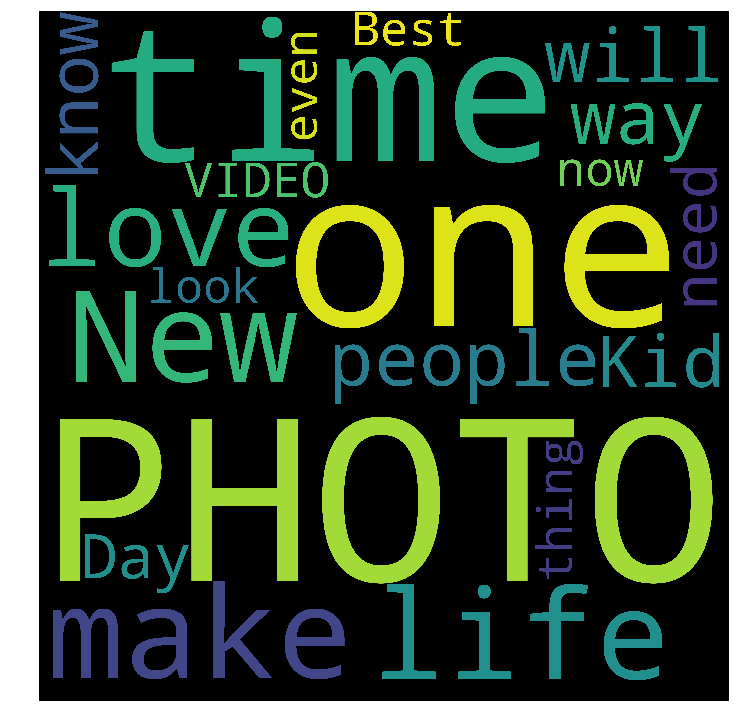

POLITICS


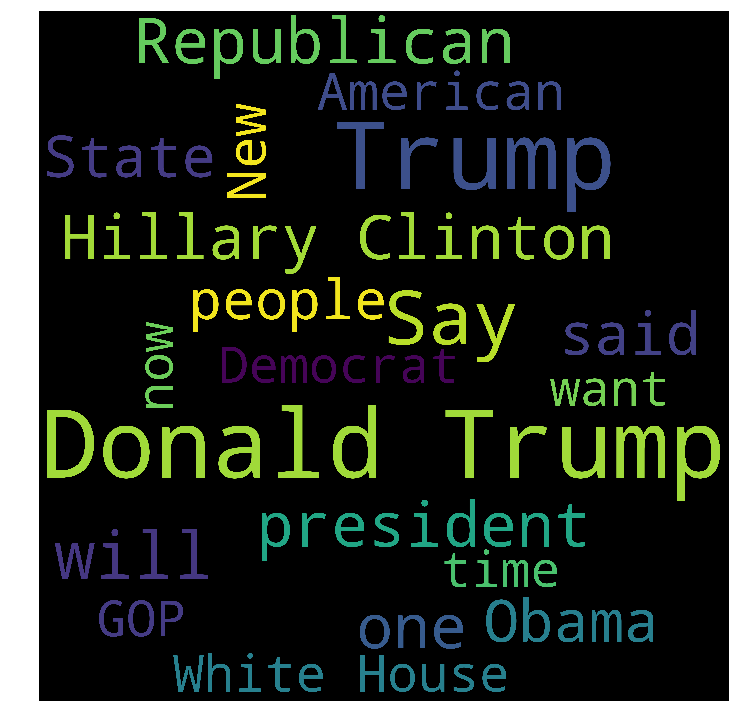

GLOBAL


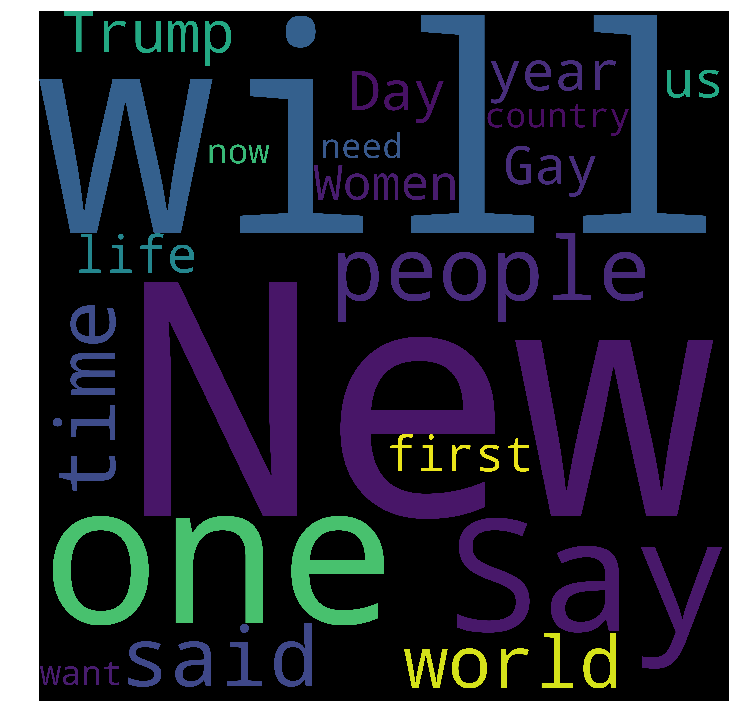

MISCELLANEOUS


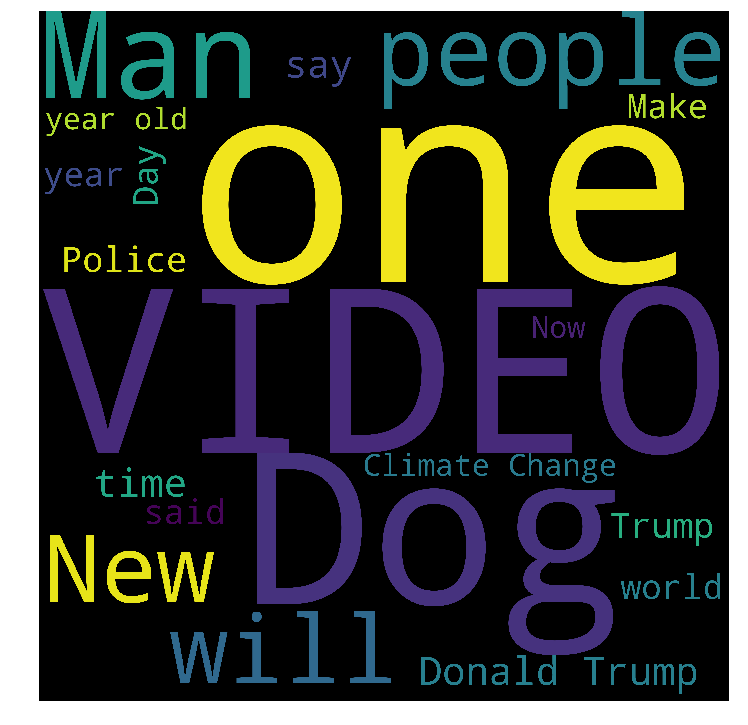

ENTERTAINMENT


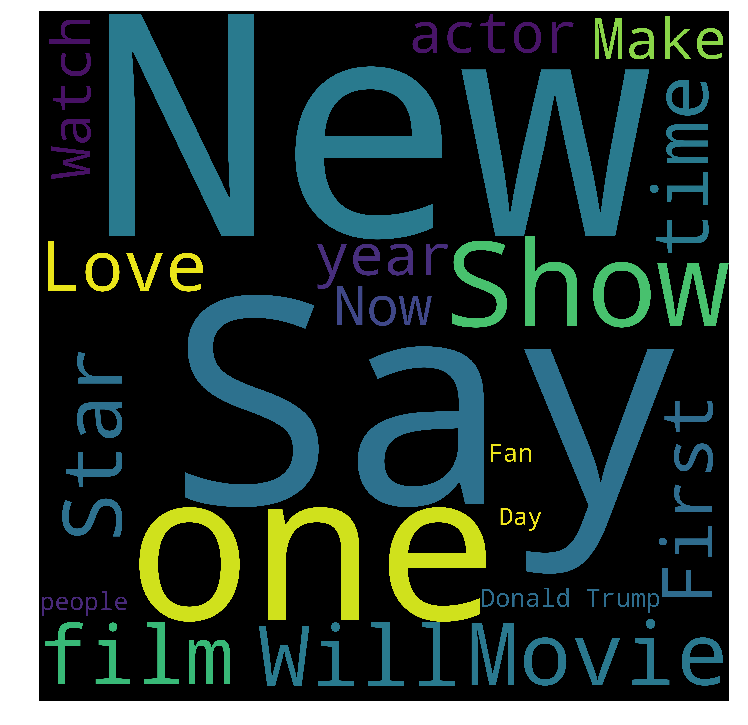

EDUCATION


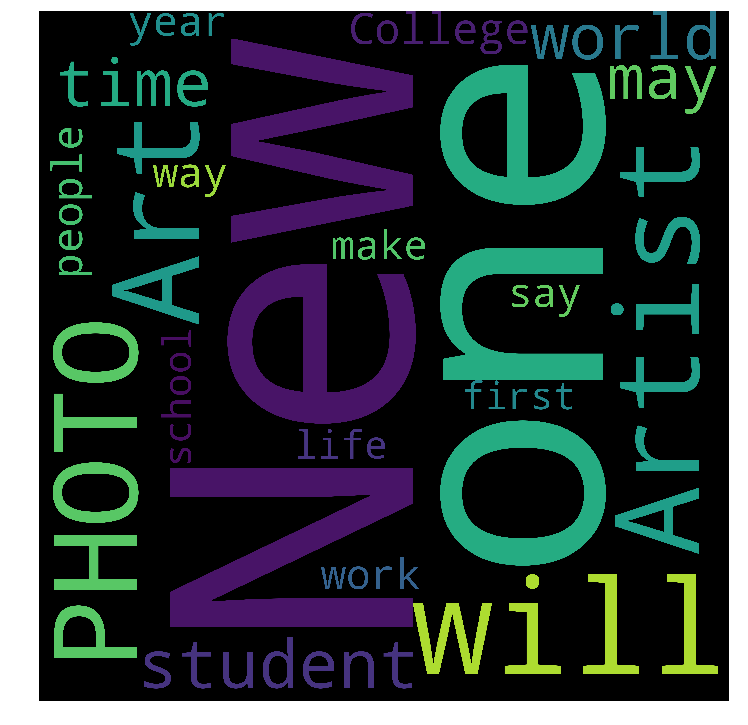

BUSINESS


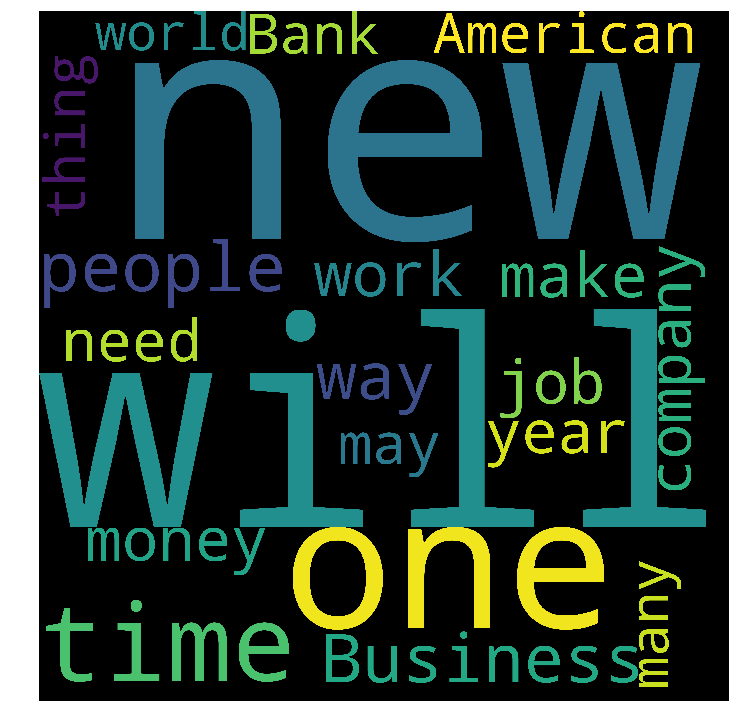

SPORTS


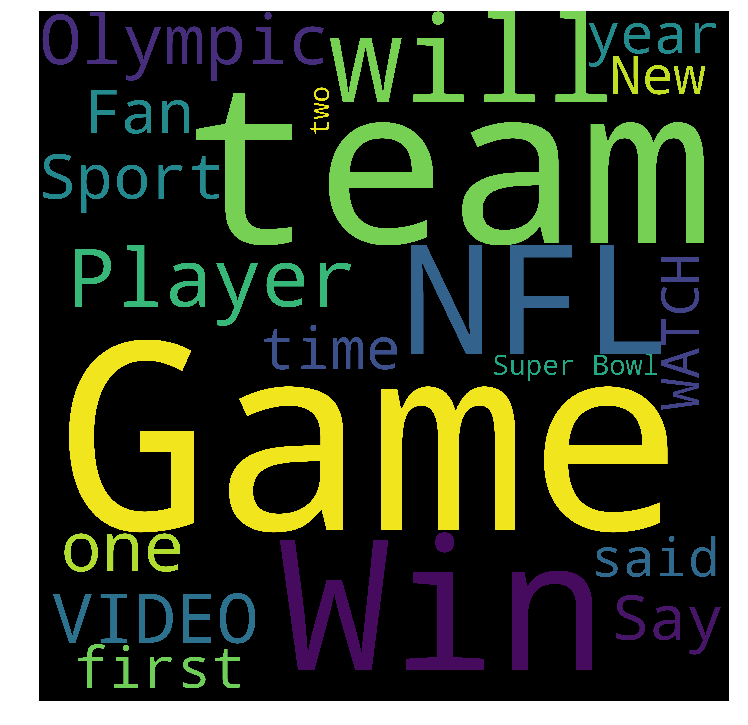

In [22]:
for x in plotdata.index:
    buildWordCloud(x)

### Text Cleaning

In [23]:
import nltk, re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def spell_correct(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\0s", "0", text)    
    return text

def remove_url(text):
    URL_REGEX = re.compile(r'''((http[s]?://)[^ <>'"{}|\\^`[\]]*)''')
    return URL_REGEX.sub(r' ', text)

remove_punc = lambda x : re.sub(r"\W", ' ', x)

remove_num = lambda x : re.sub(r"\d", ' ', x)

remove_extra_spaces = lambda x : re.sub(r"\s+", ' ', x)

lower_case = lambda x : x.lower()

with open('stopwords.txt') as f:
    sw = map(lambda x : x.strip(), f.readlines())
stop_words = set(nltk.corpus.stopwords.words('english'))|set(sw)
remove_stopwords = lambda x: ' '.join(word for word in x.split() if word not in stop_words)

ps = PorterStemmer()
ps_stem = lambda x: ' '.join(ps.stem(word) for word in x.split())

wnl = WordNetLemmatizer()
wnl_lemmatize = lambda x: ' '.join(wnl.lemmatize(word) for word in x.split())

def tag_pos(x):
    tag_list =  nltk.pos_tag(nltk.word_tokenize(x))
    pos = ""
    for t in tag_list:
        pos += t[0] +'(' + t[1] +')' + ' '
    return pos

def cleanText(x, rsw, stm, lem, tgps):
    x = str(x)
    x = remove_url(x)
    x = lower_case(x)
    x = spell_correct(x)
    x = remove_punc(x)
    x = remove_num(x)
    x = remove_extra_spaces(x)
    
    if rsw:
        x = remove_stopwords(x)
    if stm:
        x = ps_stem(x)
    if lem:
        x = wnl_lemmatize(x)
    if tgps:
        x = tag_pos(x)
    return x

In [24]:
data['article_clean'] = data['article'].progress_apply(lambda x : cleanText(x, True, False, False, False))

In [25]:
data.head()

,category,headline,short_description,article,article_clean
0,MISCELLANEOUS,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",She left her husband. He killed their children. Just another day in America.,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.",mass shootings texas week tv left husband killed children day america
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song Of course it has a song.,smith joins diplo nicky jam world cup official song course song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,Hugh Grant Marries For The First Time At Age 57 The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,hugh grant marries time age actor longtime girlfriend anna eberstein tied knot civil ceremony
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,jim carrey blasts castrato adam schiff democrats new artwork actor gives dems ass kicking fighting hard donald trump
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""","Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",julianna margulies uses donald trump poop bags pick dog dietland actress said using bags really cathartic therapeutic moment


## Machine Learing

In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.multiclass import OneVsRestClassifier

In [27]:
from sklearn.model_selection import cross_val_score
model_accuracies = pd.DataFrame()

### TFIDF Vectorization

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer = TfidfVectorizer()
vectorizer.fit(data['article_clean'])
X = vectorizer.transform(data['article_clean'])

In [30]:
Y = pd.get_dummies(data['category'])

In [31]:
print("X shape:", X.shape, "Y shape: ", Y.shape)

X shape: (200853, 85398) Y shape:  (200853, 8)


### Model Training

#### Logistic Regression

In [32]:
model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
scores = cross_val_score(model, X, Y, cv=10)
print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
model_accuracies['LR'] = scores

Accuracy: 0.56 (+/- 0.14)


#### Multinomial NB

In [33]:
model = OneVsRestClassifier(MultinomialNB())
scores = cross_val_score(model, X, Y, cv=10)
print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
model_accuracies['MNB'] = scores

Accuracy: 0.43 (+/- 0.19)


#### Bernoulli NB

In [34]:
model = OneVsRestClassifier(BernoulliNB())
scores = cross_val_score(model, X, Y, cv=10)
print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
model_accuracies['BNB'] = scores

Accuracy: 0.55 (+/- 0.14)


#### SGD Classifier - hinge loss

In [35]:
model = OneVsRestClassifier(SGDClassifier(loss='hinge', max_iter=1000, tol=0.001))
scores = cross_val_score(model, X, Y, cv=10)
print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
model_accuracies['SGD-hinge'] = scores

Accuracy: 0.44 (+/- 0.17)


#### SGD Classifier - log loss

In [36]:
model = OneVsRestClassifier(SGDClassifier(loss='log', max_iter=1000, tol=0.001))
scores = cross_val_score(model, X, Y, cv=10)
print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
model_accuracies['SGD-log'] = scores

Accuracy: 0.38 (+/- 0.18)


#### SGD Classifier - perceptron loss

In [37]:
model = OneVsRestClassifier(SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001))
scores = cross_val_score(model, X, Y, cv=10)
print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
model_accuracies['SGD-perceptron'] = scores

Accuracy: 0.52 (+/- 0.10)


### Model Comparison

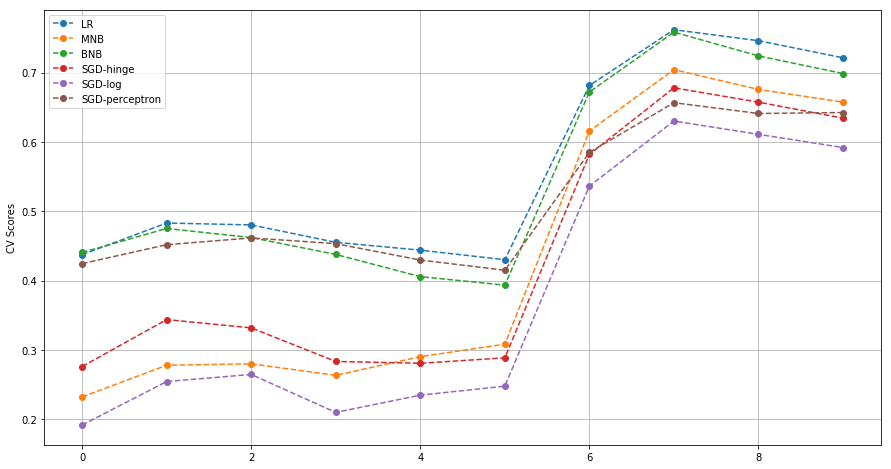

In [38]:
plt.figure(1, figsize=(15, 8))
for x in model_accuracies:
    plt.plot(model_accuracies[x], '--o',label=x)
plt.ylabel('CV Scores')    
plt.legend()
plt.grid()
plt.show()

## Model Training

In [39]:
models = {
    'lr': OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000)),
    'mnb': OneVsRestClassifier(MultinomialNB()),
    'bnb': OneVsRestClassifier(BernoulliNB()),
    'sgd-hinge': OneVsRestClassifier(SGDClassifier(loss='hinge', max_iter=1000, tol=0.001)),
    'sgd-log': OneVsRestClassifier(SGDClassifier(loss='log', max_iter=1000, tol=0.001)),
    'sgd-perceptron': OneVsRestClassifier(SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001))
}

for model in tqdm(models.values()):
    model.fit(X, Y)

## Pickling

In [40]:
DIR = "E:/Models/News-Classification-Kaggle-Data/"
for k, v in tqdm(models.items()):
    pickle.dump(v, open(DIR+k+'.pkl', 'wb'))
pickle.dump(vectorizer, open(DIR+'vectorizer.pkl', 'wb'))   